In [21]:
from pathlib import Path
from keyword_spotting.utils import add_noise, play_audio_from_file, play_audio_from_array
from keyword_spotting.feature_extraction.utils import read_wav, extract_features
import pickle
import numpy as np
import matplotlib.pyplot as plt

from simpleaudio import WaveObject

In [2]:
DATASET_PATH = Path('/home/luciano/speech_2')

# Data augmentation: Noise adding

In [38]:
with open(DATASET_PATH / 'X_train.pickle', 'rb') as file:
    wavs = pickle.load(file)

In [39]:
sample_rate, signal = read_wav(DATASET_PATH / wavs[56])
sample_rate_noise, signal_noise = add_noise(sample_rate, signal, DATASET_PATH, random_noise=False, noise_factor=0.5)

/home/luciano/fuentes/hda/keyword_spotting/feature_extraction/utils.py:26: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(file)


In [40]:
play_audio_from_array(signal)

In [41]:
play_audio_from_array(signal_noise)

# Feature extraction

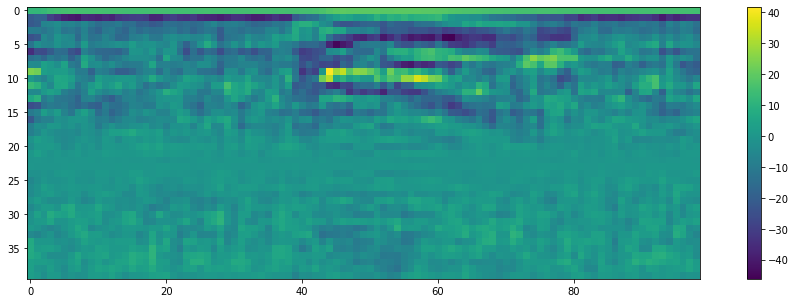

In [42]:
q = extract_features(signal, sample_rate)
fig, ax = plt.subplots(figsize=(17, 5))
image = ax.imshow(q.T)
fig.colorbar(image)

# Evaluation 